# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.13/x64/bin/python -m pip install --upgrade pip' command.


#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


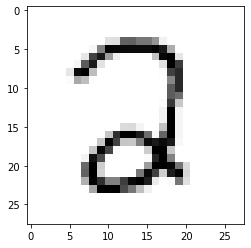

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2479
Training Accuracy: 0.5502, Testing Accuracy: 0.5428



Epoch 10, Loss 0.1248
Training Accuracy: 0.9021, Testing Accuracy: 0.9093



Epoch 20, Loss 0.0682
Training Accuracy: 0.9327, Testing Accuracy: 0.9380



Epoch 30, Loss 0.0502
Training Accuracy: 0.9466, Testing Accuracy: 0.9541



Epoch 40, Loss 0.0419
Training Accuracy: 0.9545, Testing Accuracy: 0.9602



Epoch 50, Loss 0.0373
Training Accuracy: 0.9582, Testing Accuracy: 0.9627



Epoch 60, Loss 0.0342
Training Accuracy: 0.9609, Testing Accuracy: 0.9652



Epoch 70, Loss 0.0319
Training Accuracy: 0.9629, Testing Accuracy: 0.9677



Epoch 80, Loss 0.0302
Training Accuracy: 0.9648, Testing Accuracy: 0.9682



Epoch 90, Loss 0.0288
Training Accuracy: 0.9664, Testing Accuracy: 0.9698



Epoch 100, Loss 0.0276
Training Accuracy: 0.9677, Testing Accuracy: 0.9698



Epoch 110, Loss 0.0265
Training Accuracy: 0.9684, Testing Accuracy: 0.9708



Epoch 120, Loss 0.0256
Training Accuracy: 0.9695, Testing Accuracy: 0.9713



Epoch 130, Loss 0.0248
Training Accuracy: 0.9702, Testing Accuracy: 0.9728



Epoch 140, Loss 0.0241
Training Accuracy: 0.9717, Testing Accuracy: 0.9733



Epoch 150, Loss 0.0234
Training Accuracy: 0.9722, Testing Accuracy: 0.9738



Epoch 160, Loss 0.0228
Training Accuracy: 0.9735, Testing Accuracy: 0.9738



Epoch 170, Loss 0.0222
Training Accuracy: 0.9744, Testing Accuracy: 0.9743



Epoch 180, Loss 0.0217
Training Accuracy: 0.9747, Testing Accuracy: 0.9758



Epoch 190, Loss 0.0212
Training Accuracy: 0.9753, Testing Accuracy: 0.9758



Epoch 200, Loss 0.0207
Training Accuracy: 0.9759, Testing Accuracy: 0.9763



Epoch 210, Loss 0.0202
Training Accuracy: 0.9769, Testing Accuracy: 0.9768



Epoch 220, Loss 0.0198
Training Accuracy: 0.9772, Testing Accuracy: 0.9768



Epoch 230, Loss 0.0194
Training Accuracy: 0.9776, Testing Accuracy: 0.9773



Epoch 240, Loss 0.019
Training Accuracy: 0.9782, Testing Accuracy: 0.9778



Epoch 250, Loss 0.0186
Training Accuracy: 0.9784, Testing Accuracy: 0.9778



0.0016881843278655178

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2432
Training Accuracy: 0.6779, Testing Accuracy: 0.7147



Epoch 10, Loss 0.1041
Training Accuracy: 0.9088, Testing Accuracy: 0.9199



Epoch 20, Loss 0.0796
Training Accuracy: 0.9272, Testing Accuracy: 0.9425



Epoch 30, Loss 0.0684
Training Accuracy: 0.9345, Testing Accuracy: 0.9511



Epoch 40, Loss 0.0616
Training Accuracy: 0.9407, Testing Accuracy: 0.9526



Epoch 50, Loss 0.0571
Training Accuracy: 0.9455, Testing Accuracy: 0.9561



Epoch 60, Loss 0.0537
Training Accuracy: 0.9488, Testing Accuracy: 0.9597



Epoch 70, Loss 0.0512
Training Accuracy: 0.9500, Testing Accuracy: 0.9622



Epoch 80, Loss 0.0491
Training Accuracy: 0.9517, Testing Accuracy: 0.9627



Epoch 90, Loss 0.0474
Training Accuracy: 0.9523, Testing Accuracy: 0.9627



Epoch 100, Loss 0.046
Training Accuracy: 0.9537, Testing Accuracy: 0.9632



Epoch 110, Loss 0.0448
Training Accuracy: 0.9548, Testing Accuracy: 0.9637



Epoch 120, Loss 0.0437
Training Accuracy: 0.9548, Testing Accuracy: 0.9642



Epoch 130, Loss 0.0428
Training Accuracy: 0.9556, Testing Accuracy: 0.9642



Epoch 140, Loss 0.042
Training Accuracy: 0.9560, Testing Accuracy: 0.9652



Epoch 150, Loss 0.0412
Training Accuracy: 0.9567, Testing Accuracy: 0.9652



Epoch 160, Loss 0.0406
Training Accuracy: 0.9574, Testing Accuracy: 0.9657



Epoch 170, Loss 0.04
Training Accuracy: 0.9578, Testing Accuracy: 0.9672



Epoch 180, Loss 0.0394
Training Accuracy: 0.9580, Testing Accuracy: 0.9677



Epoch 190, Loss 0.0389
Training Accuracy: 0.9581, Testing Accuracy: 0.9677



Epoch 200, Loss 0.0384
Training Accuracy: 0.9585, Testing Accuracy: 0.9677



Epoch 210, Loss 0.038
Training Accuracy: 0.9587, Testing Accuracy: 0.9682



Epoch 220, Loss 0.0376
Training Accuracy: 0.9593, Testing Accuracy: 0.9682



Epoch 230, Loss 0.0372
Training Accuracy: 0.9595, Testing Accuracy: 0.9688



Epoch 240, Loss 0.0368
Training Accuracy: 0.9599, Testing Accuracy: 0.9693



Epoch 250, Loss 0.0365
Training Accuracy: 0.9604, Testing Accuracy: 0.9693



0.04111504930938906

### Comparing results of NN and LR

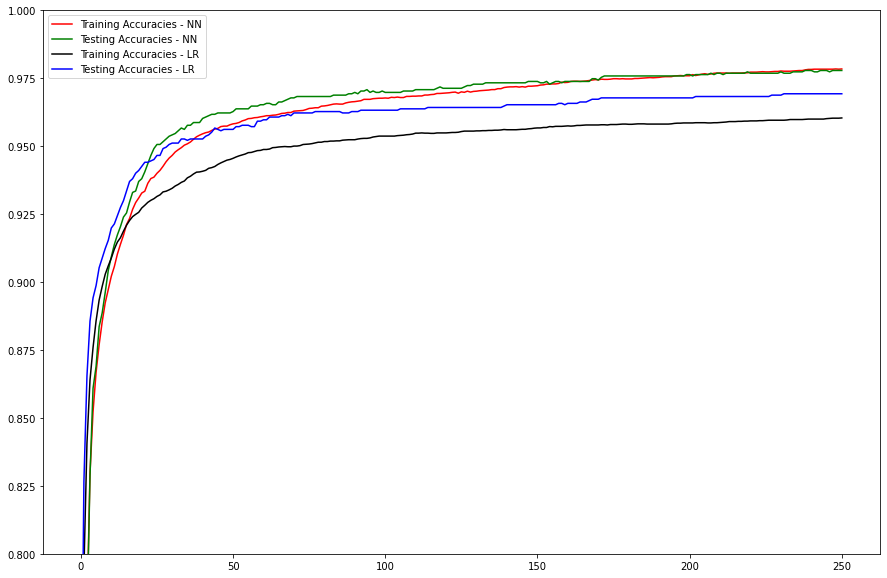

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

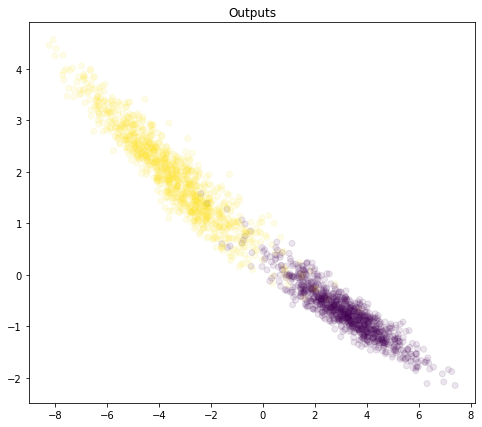

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

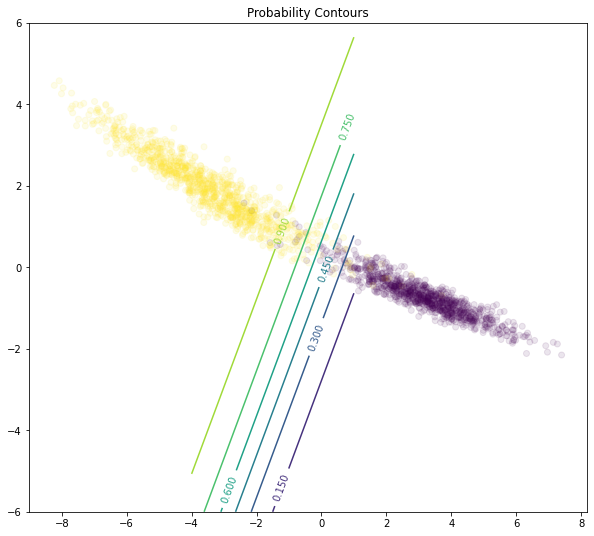

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );